# Separate the spectra in groups according to their behavior

Os espectros serão agrupados como:
- G1: Dominado por starburts: sobe sempre para o azul
- G2: Sobe para o azul e um pouco para o vermelho
- G3: Sobe muito para o vermelho

## Inspeção visual

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
## importing libraries
from functions import load_spectrum, plot_spectrum_ax, make_spectrum_panel, plot_overlaid_spectra
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
import pandas as pd

In [4]:
hdul = fits.open("deGraaff2025_lrds_withdups_blackbody_eline_fits.fits")
hdul.info()
data = hdul[1].data

files = data["file"]
redshifts = data["zspec"]

#transforming into numpy arrays
files = np.array(files)
redshifts = np.array(redshifts)

print(redshifts.min(), redshifts.max())

spec_info_all = list(zip(files, redshifts))

#removing info from the spectra of program MoM (GO5224) since we don't have its spectra
spec_info_clear = spec_info_all[:59] + spec_info_all[72:]
print(len(spec_info_clear))
print(spec_info_clear[:10])


Filename: deGraaff2025_lrds_withdups_blackbody_eline_fits.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  PHOT          1 BinTableHDU     94   134R x 32C   [K, K, 24A, 57A, D, D, D, D, D, K, 196A, L, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D]   
2.2734878 9.294025001594942
121
[(np.str_('capers-cos07-v4_prism-clear_6368_43711.spec.fits'), np.float64(4.42044)), (np.str_('capers-cos10-v4_prism-clear_6368_119334.spec.fits'), np.float64(9.294025001594942)), (np.str_('capers-cos10-v4_prism-clear_6368_30440.spec.fits'), np.float64(3.5045)), (np.str_('capers-cos10-v4_prism-clear_6368_32659.spec.fits'), np.float64(4.44217)), (np.str_('capers-cos13-v4_prism-clear_6368_160387.spec.fits'), np.float64(6.38003)), (np.str_('capers-cos19-v4_prism-clear_6368_4771.spec.fits'), np.float64(5.92735)), (np.str_('capers-cos19-v4_prism-clear_6368_9226.spec.fits'), np.float64(3.7241027)), (np.str_('

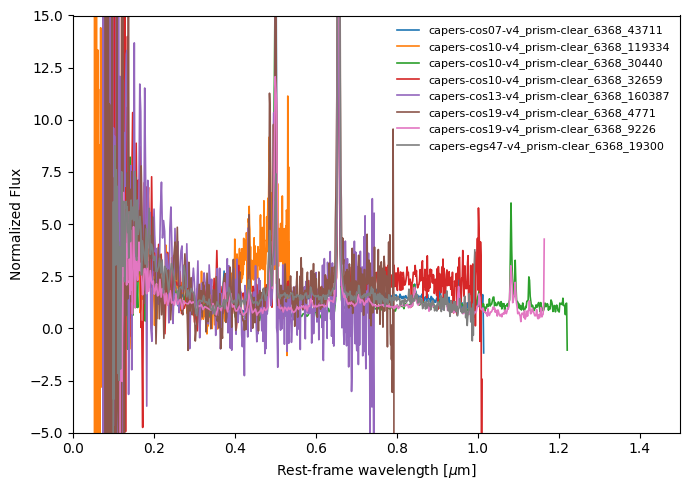

In [5]:
fig = plot_overlaid_spectra(
    spec_info_clear,
    indices=range(0, 8),
    loader_kwargs=dict(
        input_flux_unit="uJy",
        wave_unit="um",
        restframe=True,
        normalize=True,
    ),
    xlim=(0, 1.5),
    ylim=(-5,15)
)
plt.show()

